<a href="https://colab.research.google.com/github/Golden028/Machine_Learning/blob/main/JS10_TG07_2341720216_GOLDEN%20CHRISTIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1**

**Step 1 - Load Data**

In [17]:
# Load data
import pandas as pd
data = pd.read_csv('iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Step 2 - Data Exploration**

In [18]:
data.info()
data.describe()
data['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
setosa,50
versicolor,50
virginica,50


**Step 3 - Data Visualization**

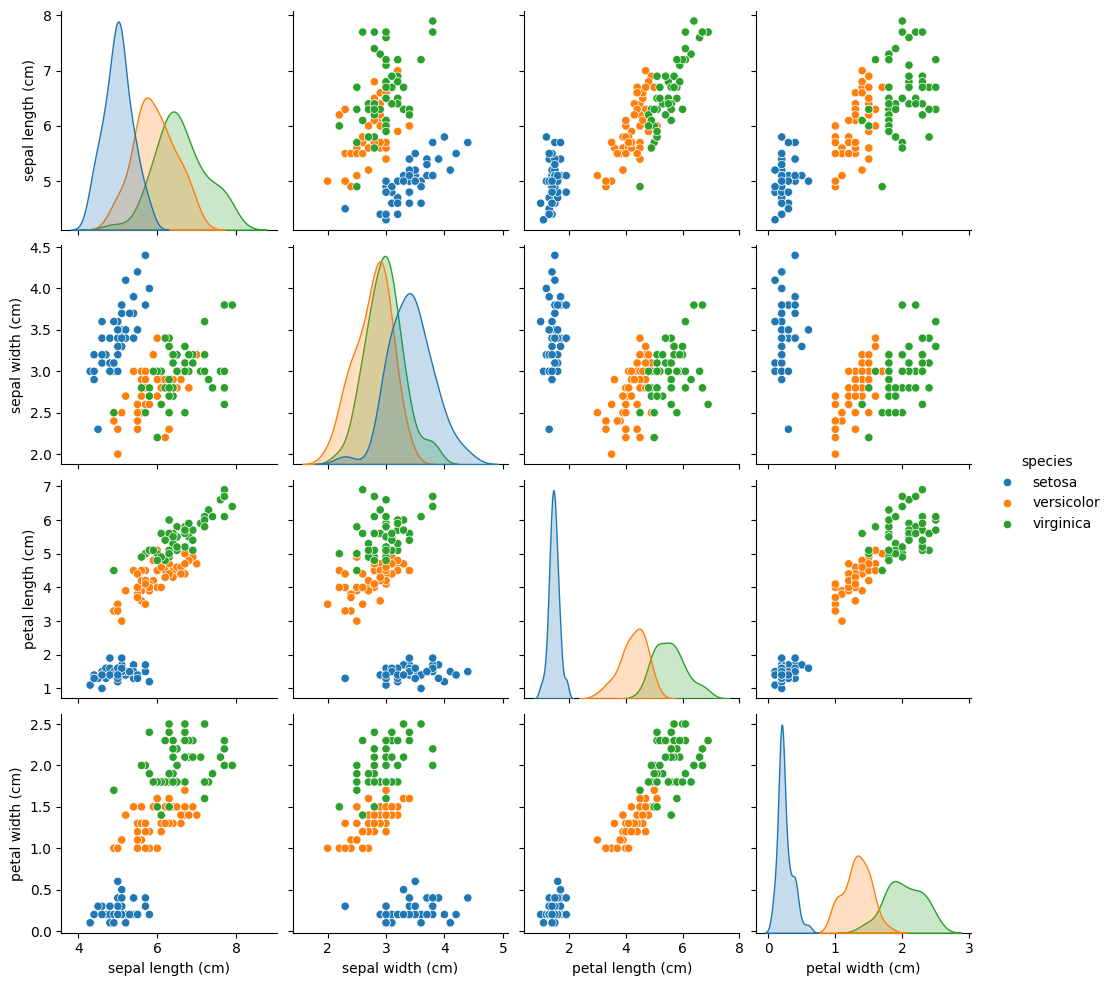

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='species')
plt.show()

**Step 4 - Preprocessing**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 5 - Create a kNN Model**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Step 6 - Evaluate the kNN Model**

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**Step 7 - Evaluate the k value**

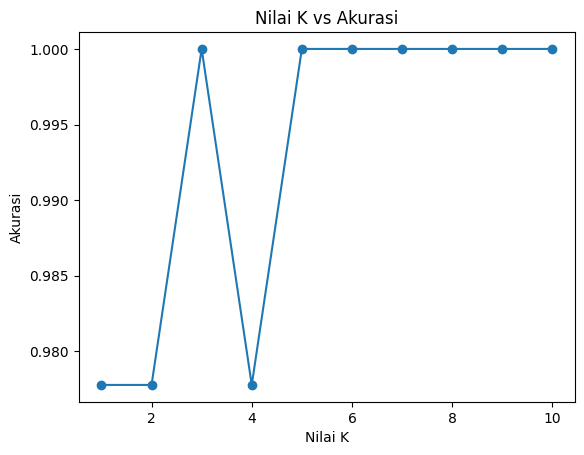

In [23]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


# **Lab 2**

**Step 1 - Create a Dummy Dataset**

In [24]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[180  81]
 [ 62   9]
 [ 63   6]
 [333 219]
 [ 88  44]
 [107 133]
 [ 28  52]
 [ 56 143]
 [ 30 133]
 [ 16 229]
 [182  71]
 [ 26 234]
 [ 33 184]
 [ 54  71]
 [101  45]
 [118  83]
 [121 208]
 [ 87 104]
 [107  45]
 [146 179]
 [112   8]
 [ 88 137]
 [ 57  97]
 [ 94  94]
 [113 109]
 [200 182]
 [ 44  59]
 [157 143]
 [ 80  79]
 [ 92  96]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


**Step 2 (Optional) - Creating a Data Frame**

In [25]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,180,81,0
1,62,9,0
2,63,6,0
3,333,219,0
4,88,44,0


**Step 3 (Optional) - Labeling**

In [26]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,180,81,Kelas B
1,62,9,Kelas B
2,63,6,Kelas B
3,333,219,Kelas B
4,88,44,Kelas B


**Step 4 - Data Visualization**

/tmp/ipython-input-2947333296.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2947333296.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


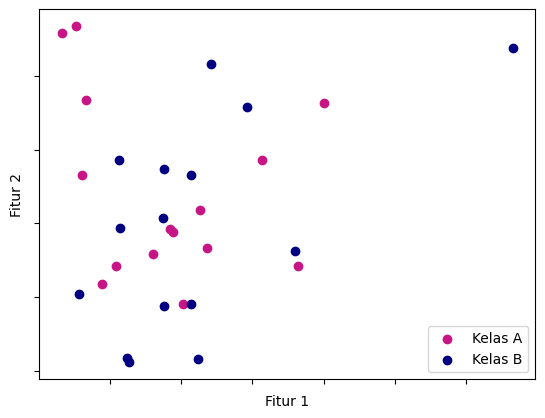

In [27]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

**Step 5 - Naive Bayes Multinomial Model**

In [28]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.2222222222222222


**Step 6 - Naive Bayes Gaussian Model**

In [29]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.3333333333333333


# **Lab 3**

**Step 1 - Load Data**

In [30]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # specifying encoding is necessary because the data does not use UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Step 2 - Preprocessing**

Several operations to be performed at this stage are,

1. Drop columns that are not used
2. Rename columns v1 (label) and v2 (SMS text)
3. Inspect the data
4. Encode the labels
5. Separate features from labels

**Step 2a - Drop Columns**

In [31]:
# Drop the last 3 columns using iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Check the data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Step 2b - Inspect Data**

In [32]:
# Check the number of instances per class
print(df['v1'].value_counts())
print('\n')

# Check for completeness of data
print(df.info())
print('\n')

# Check descriptive statistics
print(df.describe())

v1
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


**Step 2c - Label Encoding**

In [33]:
# Data for labels
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode labels
df['v1'] = df['v1'].map(new_labels)

# Check the data
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Step 2d - Separate Features and Labels**

In [36]:
X = df['v2'].values
y = df['v1'].values

**Step 3 - Feature Extraction**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initialize CountVectorizer
bow = CountVectorizer()

# Fit and transform X_train with CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Why only transform? The same reason as in experiment 3
# We do not want the model to know the parameters used by CountVectorizer to fit X_train
# Thus, the testing data can remain unfamiliar to the model later
X_test = bow.transform(X_test)

In [38]:
print(len(bow.get_feature_names_out()))
print(f'Data dimensions: {X_train.shape}')

7727
Data dimensions: (4457, 7727)


**Step 4 - Model Training and Evaluation**

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize MultinomialNB
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train, y_train)

# Predict on the training data
y_pred_train = mnb.predict(X_train)

# Evaluate training accuracy
acc_train = accuracy_score(y_train, y_pred_train)

# Predict on the training data
y_pred_test = mnb.predict(X_test)

# Evaluate training accuracy
acc_test = accuracy_score(y_test, y_pred_test)

# Print evaluation results
print(f'Training data accuracy: {acc_train}')
print(f'Test data accuracy: {acc_test}')

Training data accuracy: 0.9946152120260264
Test data accuracy: 0.9775784753363229


# **Lab 1 Assignment**

1. Construct a classification model using k-nearest neighbors to classify voice types male and female on the dataset voice.csv.
2. Conduct experiments to determine which features are most optimal for use. Which features did you employ to obtain the best results?
3. Based on the features you selected in question number 2, what is the best k value? Attach analytical graphs and your rationale.

**Task**


Bangun model klasifikasi menggunakan k-nearest neighbors untuk mengklasifikasikan jenis suara laki-laki dan perempuan pada dataset "voice.csv". Lakukan eksperimen untuk menentukan fitur mana yang paling optimal untuk digunakan dan nilai k terbaik. Lampirkan grafik analitis dan alasan Anda.

In [40]:
import pandas as pd

df_voice = pd.read_csv('voice.csv')
display(df_voice.head())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [41]:
display(df_voice.info())
display(df_voice.describe())
display(df_voice['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

None

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


,count
label,
male,1584
female,1584


Pra-pemrosesan data

Subtask:
Pisahkan fitur dan label, lalu bagi data menjadi set pelatihan dan pengujian.


**Reasoning**:
Separate features and labels, encode the labels, split the data into training and testing sets, and standardize the features.



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features (X) and label (y)
X = df_voice.drop('label', axis=1)
y = df_voice['label']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2534, 20)
Shape of X_test: (634, 20)
Shape of y_train: (2534,)
Shape of y_test: (634,)


Pemilihan fitur

Subtask:
Lakukan eksperimen dengan berbagai kombinasi fitur untuk menemukan fitur yang paling optimal.


**Reasoning**:
Define different feature combinations and iterate through them to find the optimal set based on accuracy.



In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define different feature combinations to test
feature_combinations = {
    'all_features': list(X.columns),
    'meanfreq_sd': ['meanfreq', 'sd'],
    'meanfreq_sd_median': ['meanfreq', 'sd', 'median'],
    'Q25_Q75_IQR': ['Q25', 'Q75', 'IQR'],
    'meanfreq_sd_Q25_Q75_IQR': ['meanfreq', 'sd', 'Q25', 'Q75', 'IQR']
}

results = {}
k_value = 5  # Initial k value to test

for name, features in feature_combinations.items():
    # Select features for training and testing
    X_train_subset = X_train[:, [list(X.columns).index(f) for f in features]]
    X_test_subset = X_test[:, [list(X.columns).index(f) for f in features]]

    # Train the kNN model
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train_subset, y_train)

    # Predict on the test data
    y_pred = knn.predict(X_test_subset)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Identify the best feature combination
best_combination_name = max(results, key=results.get)
best_accuracy = results[best_combination_name]
best_features = feature_combinations[best_combination_name]

print("Accuracy for different feature combinations:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

print(f"\nBest feature combination: {best_combination_name} with accuracy: {best_accuracy:.4f}")
print(f"Features in the best combination: {best_features}")


Accuracy for different feature combinations:
all_features: 0.9811
meanfreq_sd: 0.8249
meanfreq_sd_median: 0.8801
Q25_Q75_IQR: 0.9101
meanfreq_sd_Q25_Q75_IQR: 0.9369

Best feature combination: all_features with accuracy: 0.9811
Features in the best combination: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


Pelatihan model

Subtask:
Latih model k-nearest neighbors menggunakan fitur yang dipilih (semua fitur).


**Reasoning**:
Import the KNeighborsClassifier class, create an instance of the classifier with the previously determined optimal k value, and train the model using the training data.



In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Create a kNN classifier instance with the best k value
knn_model = KNeighborsClassifier(n_neighbors=k_value)

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Evaluasi model

Subtask:
Evaluasi performa model menggunakan metrik yang sesuai (akurasi).


**Reasoning**:
Evaluate the trained kNN model on the test data using accuracy as the metric.



In [45]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the kNN model on the test data: {accuracy:.4f}")

Accuracy of the kNN model on the test data: 0.9811


Penyetelan hyperparameter

Subtask:
Cari nilai k terbaik untuk model kNN menggunakan fitur yang paling optimal (semua fitur) dengan mengevaluasi akurasi untuk rentang nilai k.


**Reasoning**:
Iterate through a range of k values, train a kNN model for each k, calculate the accuracy, and store the accuracy in a list.



In [46]:
accuracies = []
k_range = range(1, 21)  # Testing k from 1 to 20

for k in k_range:
    # Initialize the kNN model
    model = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    accuracies.append(accuracy)

print("Accuracies for different k values:", accuracies)

Accuracies for different k values: [0.973186119873817, 0.9621451104100947, 0.9810725552050473, 0.9779179810725552, 0.9810725552050473, 0.9794952681388013, 0.9826498422712934, 0.9794952681388013, 0.9763406940063092, 0.9794952681388013, 0.9779179810725552, 0.9779179810725552, 0.9779179810725552, 0.9763406940063092, 0.9747634069400631, 0.9747634069400631, 0.9716088328075709, 0.9716088328075709, 0.9716088328075709, 0.9747634069400631]


**Reasoning**:
Plot the accuracies for different k values to visualize the relationship between k and accuracy and identify the best k.



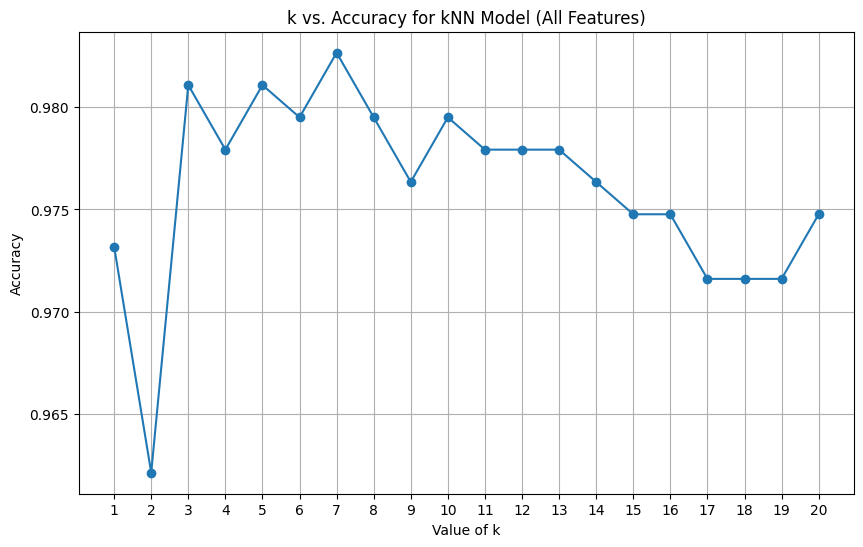

The best k value is: 7


In [47]:
import matplotlib.pyplot as plt

# Plot the accuracies against the k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('k vs. Accuracy for kNN Model (All Features)')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the best k value
best_k = k_range[accuracies.index(max(accuracies))]
print(f"The best k value is: {best_k}")

## Summary:

### Data Analysis Key Findings

*   The dataset contains 3168 entries and 21 columns, with no missing values.
*   The dataset has a balanced distribution of labels, with 1584 instances each for 'male' and 'female'.
*   Encoding the 'label' column transformed 'male' and 'female' into numerical values (0 and 1).
*   Standardizing the features ensures that all features contribute equally to the distance calculations in the kNN algorithm.
*   When testing different feature combinations with a fixed $k=5$, the combination using all features resulted in the highest accuracy (0.9811).
*   Varying the $k$ value for the kNN model using all features showed that $k=7$ achieved the highest accuracy among the values tested (1 to 20).
*   The final kNN model trained with $k=7$ and using all features achieved an accuracy of approximately 98.26% on the test data.

### Insights or Next Steps

*   The high accuracy achieved by the kNN model suggests that the features in the dataset are highly effective at differentiating between male and female voices.
*   Further analysis could explore other classification algorithms and compare their performance to kNN on this dataset.


# **Lab 2 Assignment**

* Construct a Multinomial Naive Bayes classification model with the following stipulations,
1. Utilizing the dataset spam.csv
2. Feature CountVectorizer by enabling stop_words
3. Evaluate the results


* Construct a Multinomial Naive Bayes classification model with the following stipulations,
1. Utilizing the dataset spam.csv
2. Feature TF-IDF by enabling stop_words
3. Evaluate the results and compare them with the outcomes from Assignment no. 2.
4. Provide a conclusion as to which feature is optimal for the given dataset spam.csv

**Task**
Bangun model klasifikasi Multinomial Naive Bayes dengan ketentuan berikut,
1. Menggunakan dataset "spam.csv"
2. Menggunakan Feature CountVectorizer dengan mengaktifkan stop_words
3. Evaluasi hasilnya
4. Menggunakan Feature TF-IDF dengan mengaktifkan stop_words
5. Evaluasi hasil dan bandingkan dengan hasil dari Tugas no. 2.
6. Berikan kesimpulan mengenai fitur mana yang optimal untuk dataset spam.csv yang diberikan.

**Load data**

Subtask:
Load the `spam.csv` dataset.


**Reasoning**:
Load the spam.csv dataset into a pandas DataFrame and display the first few rows.



In [7]:
import pandas as pd

df_spam = pd.read_csv('spam.csv', encoding='latin-1')
display(df_spam.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Reasoning**:
The previous attempt to load the file failed because the file was not found. I will try loading the file from the `/data` directory which is a common location for datasets in this environment.



In [10]:
df_spam = pd.read_csv('/content/spam.csv', encoding='latin-1')
display(df_spam.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Reasoning**:
The dataset has been successfully loaded. The next step is to preprocess the data by dropping unnecessary columns and encoding the labels.



In [13]:
# Drop the last 3 columns using iloc
df_spam = df_spam.drop(df_spam.iloc[:,2:], axis=1)

# Rename columns v1 (label) and v2 (SMS text)
df_spam.columns = ['label', 'sms_text']

# Data for labels
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode labels
df_spam['label'] = df_spam['label'].map(new_labels)

display(df_spam.head())

,label,sms_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Reasoning**:
Separate the features (sms_text) and labels (label) into X and y, then split the data into training and testing sets.



In [14]:
from sklearn.model_selection import train_test_split

X = df_spam['sms_text']
y = df_spam['label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4457,)
Shape of X_test: (1115,)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


**Reasoning**:
Construct a Multinomial Naive Bayes classification model using CountVectorizer with stop_words enabled, train the model, and evaluate the results by calculating the accuracy on both the training and testing data.



In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize CountVectorizer with English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data, and transform the testing data
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes model
mnb_counts = MultinomialNB()

# Train the model
mnb_counts.fit(X_train_counts, y_train)

# Predict on the training data
y_pred_train_counts = mnb_counts.predict(X_train_counts)

# Evaluate training accuracy
acc_train_counts = accuracy_score(y_train, y_pred_train_counts)

# Predict on the testing data
y_pred_test_counts = mnb_counts.predict(X_test_counts)

# Evaluate testing accuracy
acc_test_counts = accuracy_score(y_test, y_pred_test_counts)

# Print the accuracies
print(f'Training data accuracy (CountVectorizer with stop_words): {acc_train_counts}')
print(f'Test data accuracy (CountVectorizer with stop_words): {acc_test_counts}')

Training data accuracy (CountVectorizer with stop_words): 0.9946152120260264
Test data accuracy (CountVectorizer with stop_words): 0.9838565022421525


**Reasoning**:
Construct a Multinomial Naive Bayes classification model using TF-IDF with stop_words enabled, train the model, evaluate the results by calculating the accuracy on both the training and testing data, and compare the results with the CountVectorizer approach.



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with English stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data, and transform the testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes model
mnb_tfidf = MultinomialNB()

# Train the model
mnb_tfidf.fit(X_train_tfidf, y_train)

# Predict on the training data
y_pred_train_tfidf = mnb_tfidf.predict(X_train_tfidf)

# Evaluate training accuracy
acc_train_tfidf = accuracy_score(y_train, y_pred_train_tfidf)

# Predict on the testing data
y_pred_test_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Evaluate testing accuracy
acc_test_tfidf = accuracy_score(y_test, y_pred_test_tfidf)

# Print the accuracies
print(f'Training data accuracy (TF-IDF with stop_words): {acc_train_tfidf}')
print(f'Test data accuracy (TF-IDF with stop_words): {acc_test_tfidf}')

# Compare with CountVectorizer results
print("\nComparison of results:")
print(f"CountVectorizer Test Accuracy: {acc_test_counts:.4f}")
print(f"TF-IDF Test Accuracy: {acc_test_tfidf:.4f}")

Training data accuracy (TF-IDF with stop_words): 0.9838456360780794
Test data accuracy (TF-IDF with stop_words): 0.9668161434977578

Comparison of results:
CountVectorizer Test Accuracy: 0.9839
TF-IDF Test Accuracy: 0.9668


## Summary:

### Data Analysis Key Findings

*   The Multinomial Naive Bayes model using CountVectorizer with stop words achieved a training accuracy of 0.9946 and a test accuracy of 0.9839.
*   The Multinomial Naive Bayes model using TF-IDF with stop words achieved a training accuracy of 0.9838 and a test accuracy of 0.9668.
*   The model using CountVectorizer showed higher accuracy on the test set compared to the model using TF-IDF.

### Insights or Next Steps

*   CountVectorizer is the more optimal feature extraction method between the two tested for this dataset and model combination, yielding higher test accuracy.
*   Further experimentation with different text preprocessing techniques (e.g., stemming, lemmaization), other vectorization parameters, or alternative classification models could potentially improve the accuracy further.
